<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="unilogoblack.jpeg" width="250px" style="display: inline-block; margin-top: 5px;">
<a href="http://www.python.org"><img src="Python-logo-notext.svg" width="70px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>


# Basic Scientific Python

J. D. Nichols 2015


## Section 8: Matplotlib

### Basic plotting

In the previous sections we have, in a rather blasé manner, produced some plots without much explanation as to what's going on, and so we now take a look at this more closely.  We used a package called *Matplotlib*, which produces a MATLAB-like environment for plotting.  We import Matplotlib, and the main plotting library is called pyplot, usually imported like this:

In [1]:
import matplotlib.pyplot as plt

For this Notebook, we also need to execute the following lines:

In [2]:
import numpy as np
%matplotlib inline
plt.ion()

Depending on the settings of one's current session, Matplotlib will either produce a plot inline in the IPython interpreter and will update this as changes are made to the Figure (as is the case here - this is the purpose of lines 2 and 3 after the import call above), or will produce a `Figure` in its own separate window that has buttons for panning, zooming, modifying axis locations, etc.  For the purposes of pedagogy, we have been using the inline setting, but later we will switch to producing Figures in their own window, as this is the typical method used when using Python for scientific work.  

Once Pyplot is imported as above, the plotting commands are then all available in the namespace `plt`:

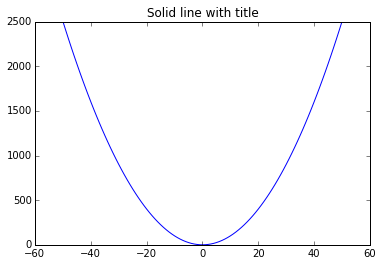

In [3]:
x = np.arange(101) - 50.
y = x**2
plt.plot(x,y)
plt.title('Solid line with title')

A straightforward call of the command `plt.plot` with `x` and `y` as arguments will plot `x` versus `y` with the default settings for the look of the figure.  There are many settings that can be changed!  The way that Matplotlib works is that it produces a `Figure` object, that contains the `FigureCanvas`, or whole area of the resulting 'picture', along with all its information and settings, and onto this there are added `Axis` objects, which define where the plotting takes place on the `FigureCanvas`.  Onto the `Axis` are placed lines, shapes (called *patches*), and text etc. that make up a nice-looking plot. 

The format of the plot lines and markers can be changed very quickly with symbols in a third argument passed to `plot`:

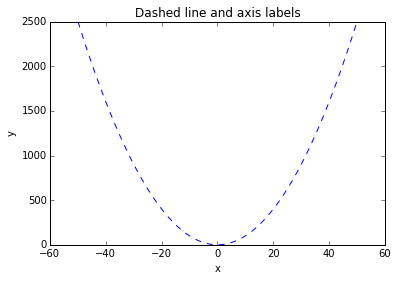

In [4]:
plt.plot(x,y, '--')
plt.title('Dashed line and axis labels')
plt.xlabel('x')
plt.ylabel('y')

Notice that we can add a title and axis labels using the `title`, `xlabel` and `ylabel` functions, and we can change the style of the wording using keywords, as we will discuss later.  Labelling each line, and then calling the `legend` function puts a legend on the plot.  Amongst other things, its location can be changed using the `loc` keyword: values can be e.g. "upper left", "lower right", or "best" - see the [Legend guide](http://matplotlib.org/users/legend_guide.html). 

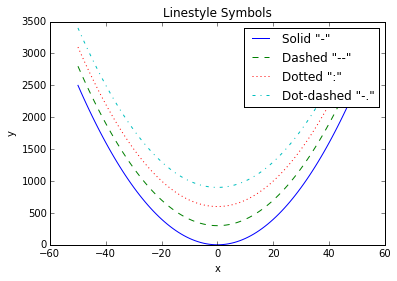

In [5]:
plt.plot(x,y, '-', label='Solid "-"')
plt.plot(x,y+300, '--', label='Dashed "--"')
plt.plot(x,y+600, ':', label='Dotted ":"')
plt.plot(x,y+900, '-.', label='Dot-dashed "-."')
plt.legend()
plt.title('Linestyle Symbols')
plt.xlabel('x')
plt.ylabel('y')

Individual points can also be plotted without connecting lines, and we can also daisy chain multiple plots into one command:

(0, 30)

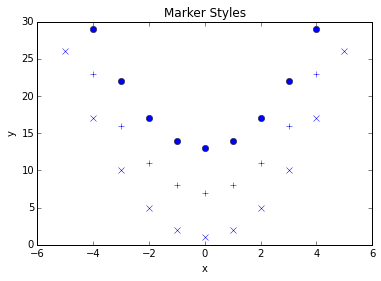

In [6]:
x = np.arange(11) - 5.
y = x**2
plt.plot(x, y+1, 'bx', x, y+7, 'b+', x, y+13, 'bo')
plt.title('Marker Styles')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,30])

The following tables provide a summary of some of the symbols used for plot lines and markers:

| Symbol | Line style |
|--------|------------|
| -      | Solid      |
| --     | Dashed     |
| :      | Dotted     |
| -.     | Dot-dashed |


| Symbol | Marker style |
|--------|--------------|
| +      | Plus         |
| x      | x            |
| .      | Large dot    |
| ,      | Pixel dot    |
| o      | Circle       |
| *      | Star         |

| Letter | Colour  |
|--------|---------|
| b      | blue    |
| g      | green   |
| r      | red     |
| c      | cyan    |
| m      | magenta |
| y      | yellow  |
| k      | black   |
| w      | white   |




Unless otherwise specified, Matplotlib cycles round the first 5 colours.  It is also worth noting that Matplotlib accepts any [HTML colour](http://www.w3schools.com/html/html_colornames.asp) and decimal numbers in strings from 0.0-1.0 (e.g. '0.5'), which produce varying degrees of grey, with 0.0 being black and 1.0 being white. 

Note also that in the above plot, the limit of the $y$-axis was set using the function `ylim`; there also is one for the $x$-axis called `xlim`.  A plot with a logarithmic $y$-axis can be produced using `semilogy`, as plotted below, and there also exist `semilogx` and `loglog`, with obvious functions.

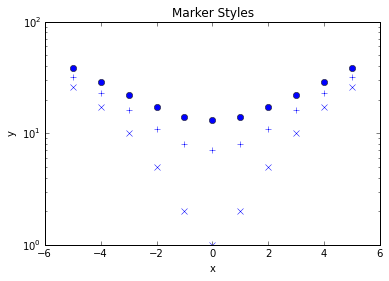

In [7]:
x = np.arange(11) - 5.
y = x**2
plt.semilogy(x, y+1, 'bx', x, y+7, 'b+', x, y+13, 'bo')
plt.title('Marker Styles')
plt.xlabel('x')
plt.ylabel('y')

#### Task 8.1

In the Maths course you saw that a periodic function $f(x)$ can be represented as a Fourier Series.  For example, a square wave oscillating between $\pm 1$ (sometimes called the Heaviside step function $H(x)$) can be represented by the Fourier Series

$$f(x)=\frac{4}{\pi}\sum_{n=1,3,5...}^\infty\frac{\sin(nx)}{n}$$

Compute the succesive approximations to the square wave from $n=1,...,11$ using a 2D array (try to **not** use a loop for this). Plot the square wave in black and, this time using a loop, the subsequent approximations to this function using different colours.

[[[ 1]
  [ 3]
  [ 5]
  [ 7]
  [ 9]
  [11]]]


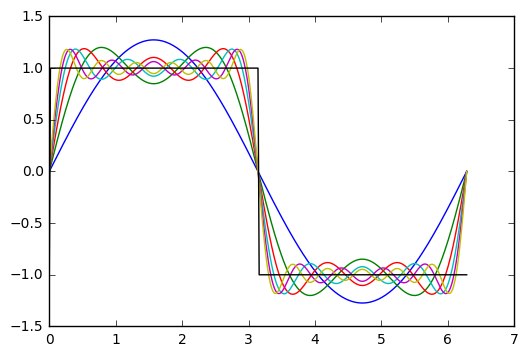

In [13]:
x = np.arange(0,361)*2*np.pi/360

def square(x):
    inx = np.sin(x) > 0
    plt.plot(x, np.where(inx, 1, -1), "k")

def n_array(n):
    y = np.arange(1,n+1)
    iny = y % 2 == 1
    return y[iny][:,np.newaxis]

def sin_n(x, n):
    return 4/np.pi*(np.sin(n*x)/n)

def plt_sum(x,  n):
    n = n_array(n)[:,0][:,np.newaxis]
    return np.cumsum(sin_n(x, n), axis = 0) 

wave = plt_sum(x, 11)

for i in range (6):
    plt.plot(x, wave[i,:])

square(x)


## Worked example: exoplanets
### ...including urllib, annotate, text, hist, polyfit, and poly1d

We now consider example in which we download some data, read it in, plot and analyse various aspects.  The intention is to indicate how Python can be used for the whole process of retrieving, manipulating, analysing, and plotting data.  The example is split over the next four cells.  Start by executing the cell below (it will take a few seconds to run...)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from urllib import urlopen
import StringIO

csvdat = urlopen('http://www.ion.le.ac.uk/~jdn/exoplanets.csv').read()
t = np.recfromcsv(StringIO.StringIO(csvdat), names=True)
t = t[1:]
t = t[t.kde == 0]

We start by importing the packages we will need.  Note that if you're continuing your session from above, numpy and matplotlib will already be imported and their import lines here will be ignored.  It is conventional, but not mandatory, to place import statements at the top of a piece of code.  Here we also import the modules `urllib` and `StringIO`.  `Urllib` is an example of a module that makes Python such a widely used and versatile language; this contains functions for interacting with other computers connected to the World Wide Web.  On line 6 we use the function `urlopen` to open a connection to a site on the web, in this case hosting a CSV file containing exoplanet data, and read the contents of the remote site into a `string`, in this case given the identifier `csvdat`. 

The string object `csvdat` then contains all the data from the CSV file on the website.  CSV ("comma separated values") is an ASCII file format commonly used by e.g. spreadsheet programs for storing data, with the individual data values separated by commas (obviously!). We then wish to transfer this information to a format usable by Numpy, e.g. a `RecArray`, and we therefore use on line 7 a function related to `recfromtxt` used above, in this case `recfromcsv`.  Recall that `recfromtxt` accepted a file as its argument, and this is also true for `recfromcsv`, so we need to use the `StringIO` function imported as part of the `StringIO` module to trick `recfromcsv` into thinking that `csvdat` is a file.  Setting `names=True` means that the column names at the top of the CSV file are transferred to the `RecArray`.  Each record in the `RecArray` now contains all the data for each planet, and each column now contains that parameter for all the planets. 

We don't need the first record (this contains simply the column names) so we remove this on line 8.  On line 9 we then take only those records for which `t.kde` is equal to 0.  This removes all planets present in the Kepler archive (this is simply for ease of use in the plots below).  

We now plot the planets' masses versus their radii, along with the associated uncertainties:

1.18155941361 0.308895833849


/cm/shared/apps/python/2.7.9/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/cm/shared/apps/python/2.7.9/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less


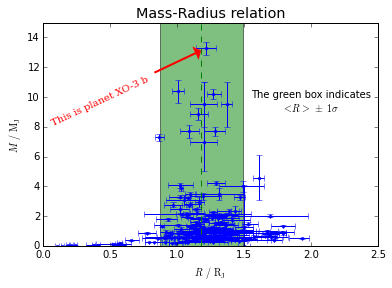

In [98]:
plt.errorbar(t.r, t.mass, xerr=[t.rlower,t.rupper], yerr=[t.masslower,t.massupper], fmt='.')
plt.xlim([0,2.5])
plt.ylim([0,15])
plt.ylabel(r'$M\,/\,\mathrm{M_J}$')
plt.xlabel(r'$R\,/\,\mathrm{R_J}$')

rfininx = np.isfinite(t.r)
mnr = np.mean(t.r[rfininx])
sdr = np.std(t.r[rfininx])
print mnr, sdr

plt.axvline(mnr, color='g', ls='--')
plt.axvspan(mnr-sdr, mnr+sdr, fc='g', alpha=0.5)

plt.title('Mass-Radius relation', size='x-large')
linx = ((t.mass > 12) & (t.mass < 14)) & ((t.r > 1) & (t.r < 1.5))
plt.annotate('This is planet '+t.name[linx][0], xy=(t.r[linx],t.mass[linx]),
             xytext=(0.05,11), family='serif', color='r', rotation=25,
             arrowprops={'facecolor':'r', 'color':'r', 'width':1, 'shrink':0.1})
plt.text(2,10, 'The green box indicates', ha='center')
plt.text(2,9, r'$<R>\,\pm\,1\sigma$', ha='center')

Points with error bars are plotted using the Matplotlib function `errorbar`, which we employ on line 1.  Note that error bars on both the $x$ and $y$ data can be present, and they can be asymmetric.  The array of planet radii is given by `t.r`, and the array of masses is in `t.mass`.  We then set the $x$ and $y$ limits on the plot using sequences of the form (min, max) passed to the functions `xlim` and `ylim` on lines 2 and 3.  

The axis labels defined on lines 4 and 5 make use the of the fact that matplotlib can render (limited) $\LaTeX$.  $\LaTeX$ maths code is enclosed within dollar symbols `'$$'` in the string which is proceeded by the letter `r` (this indicates that it is a "raw" string, and that Python should not attempt to interpret e.g. '\' symbols). As this is not a $\LaTeX$ course, we will not go into the details of the  $\LaTeX$ syntax, other than to note that `\,` means a small space, `\mathrm{something}` means do not render `<something>` in an italic font, and the underscore `_` indicates subscript. 

Next, on line 7 we determine the indices where `t.r` is finite using the Numpy function `isfinite`, which returns a boolean array equal to `True` where it is finite and `False` where is is not, e.g. where it is `nan`, which stands for "Not a number", or `inf` for infinity.  We then calculate the mean and standard deviation of these finite values using the functions `mean` and `std` on lines 8 and 9.  On line 12 the mean value is passed to the function `axvline`, which plots a line from top to bottom at the $x$ location provided, and the keywords specifcy a green, dashed line (`ls` stands for "line style"). There is an equivalent function called `axhline` that plots a horizontal line across the plot.  The 1 standard deviation range around the mean is indicated using the function `axvspan` on line 13, which similarly plots a bar from top to bottom.   In this case the keyword `fc` stands for "face colour", i.e the colour of the main body, and `alpha` is a decimal between 0-1 giving the degree of transparency, with 0.0 being totally transparent and 1.0 being totally opaque.  Note that by default the bar plotted by `axvspan` is placed behind the other objects on the Axis.

We have finally added some text, using three methods.  The first on line 15, we have met before: `title`, which by default places text above the axis in the centre.  Here we have specified that the text size is `'x-large'`.  Text sizes can be given as numbers (pt size) or pre-set relative sizes with names such as `'large'`, `'small'`, `'smaller'`, etc. Check out the Matplotlib docs [here](http://matplotlib.org/users/text_intro.html) and [here](http://matplotlib.org/users/text_props.html) for more information on text properties.  The function `annotate` allows particular points to be labeled, along with an arrow. On lines 16-19 we determine the name of the outlier point in the centre of the plot, and place a red label with a red arrow pointing to the data point.  The font family is is defined using the keyword `family`, here set to `'serif'`, and we have rotated the text by $25^\circ$ anti-clockwise.  The arrow properties are passed as a dictionary via the `arrowprops` keyword, and we have specifed the color of the arrow head and the line, the width of the line and the stand-off distance ('shrink') from the point and text.  Finally, we have added text using the `text` function, which simply places text at the location specified. The keyword `ha` stands for "horizontal alignment" (there is an equivalent for the vertical), which we have set to `'center'` (Matplotlib is American), thus centring the text on the coordinate specified.  Note that text can be in $\LaTeX$, as discussed above.

Let's go onto plotting some histograms:

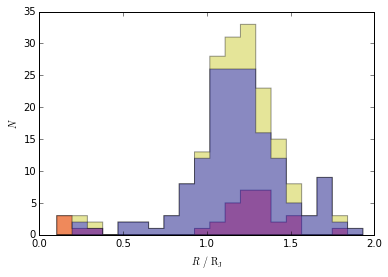

In [72]:
n, bins, patches = plt.hist(t.r[rfininx], bins=20, histtype='stepfilled', color='y', alpha=0.4)

arfininx = (np.isfinite(t.r) & np.isfinite(t.a))
plt.hist(t.r[arfininx][t.a[arfininx] < 0.03], bins=bins, 
         histtype='stepfilled', color='r', alpha=0.4)

plt.hist(t.r[arfininx][t.a[arfininx] > 0.03], bins=bins, 
         histtype='stepfilled', color='b', alpha=0.4)

plt.ylabel(r'$N$')
plt.xlabel(r'$R\,/\,\mathrm{R_J}$')

On line 1 we have plotted a histogram of the finite radius values using the function `hist`.  The parameters passed to `hist` are the data, in this case `t.r[rfininx]`; the number of bins we wish, in this case 20 (the locations are determined automatically if just a number is given); the style of the histogram, in this case a lineplot that is filled; the colour of the fill, in this case yellow; and the transparency of the fill. We also note that Matplotlib functions can return data about the plots, in this case an array containing the heights of the bars (`n`), an array containing the locations of the left edges of the bins and the right edge of the last bin (`bins`), and a list of the patches used to create the histogram (`patches`).  We use the `bins` array in the next two histograms...

On line 3, we find the indices of the records with both finite radius `t.r` and orbital semi-major axis `t.a`.  In the following lines we then produce histograms for subsets of the data, separating those whose semi-major axes are less than (red) and greater than (blue) 0.03 AU.  It is evident that the transparency results in the overlaid colours 'mixing'.  Note that, instead of passing the number 20 for the bins, we have passed the array of bins returned from the first histogram - this ensures that the remaining histograms use the same bin locations.  

We finally go on to some simple analysis.  Clearly, if the planets obey Kepler's Third Law of planetary motion, and they orbited stars of identical mass, we would expect that the distribution of points would closely follow the relation $A\propto P^{2/3}$.  Let's test this...

[  2.64290112e-10  -1.35266669e-06   3.14314936e-03   5.67971523e-02]
[ 0.67465538 -1.71582156]


/cm/shared/apps/python/2.7.9/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


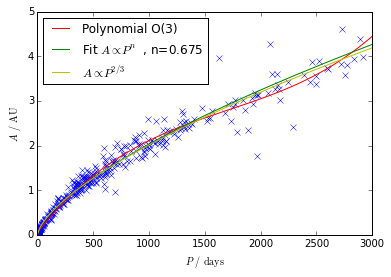

In [79]:
inx = t.per < 3000
per = t.per[inx]
a = t.a[inx]
plt.plot(per, a, 'x')
plt.xlim([0,3000])
plt.ylim([0,5])
plt.ylabel(r'$A\,/\,\mathrm{AU}$')
plt.xlabel(r'$P\,/\,\mathrm{days}$')

c = np.polyfit(per, a, 3)
print c
p = np.poly1d(c)
px = np.linspace(1,3000,200)
py = p(px)
plt.plot(px, py, 'r', label='Polynomial O(3)')

logp = np.log10(per)
loga = np.log10(a)
c = np.polyfit(logp, loga, 1)
print c
p = np.poly1d(c)
plogx = np.linspace(-1,3.5,200)
plogy = p(plogx)
plt.plot(10**plogx, 10**plogy, 'g', label=r'Fit $A\propto P^n$ '+', n={:.3f}'.format(c[0]))

kepy = (px/350.)**(2./3.)
plt.plot(px,kepy,'y', label=r'$A\propto P^{2/3}$')
plt.legend(loc='best')

On lines 1-8 we select only those planets with periods less than 3000 days, plot these planets' orbital semi-major axes versus their orbital periods, and configure some aspects of the plot.  This should all be familiar by now.

So, how do we analyse our data?   One thing we could do is simply fit a polynomial to the points and plot the result.  This is fairly simple to do in Python - we make use of the `poly1d` function.  This takes as arguments the abscissa (x values), ordinate (y values), and degree of polynomial.  In Section 6 we plotted a polynomial by writing out the equation in long hand.  For high orders of polynomial this becomes somewhat tedious!  Fortunately, Numpy provides the `Polynomial` object that allows polynomials to be defined easily from their coefficients.  Hence, e.g. to construct the polynomial $2x^2 + 3x + 1$, we simply use:

```python
p = np.poly1d([2, 3, 1])
```

To evaluate the polynomial at a particular value (or array of values) and the roots, we just do
```python
y = p[3]
roots = p.r
```

So, we fit (arbitrarily, in this case) a third order polynomial to our data and obtain the coefficients on line 10 using the function `polyfit`.  This function fits polynomials by minimising the least squares error (under the hood, this routine actually calls highly-optimised C routines in a package called LAPACK).  On line 12 we feed these coefficients into the `poly1d` function to return a `Polynomial` object, that is evaluated on line 14 at an array of periods (defined on line 13) corresponding to our plot range. The polynomial is then plotted using a red line.  We can see that our polynomial fits the data reasonably well, which is good!  However, it doesn't tell us much about whether our planets are obeying Kepler's Third Law.  To do that, we need to fit to a power law.

Fitting to power laws determines the exponents of relations, i.e. it indicates how quickly one parameter varies with respect to another.  If we take the logarithm of both sides we have

$$\log A = \log P^{2/3}\;\;,$$

which is equivalent to

$$\log A = \frac{2}{3}\log P\;\;.$$

We therefore wish to fit a linear polynomial with $\log P$ as the abscissa and $\log A$ as the ordinate values and determine the gradient of the fit.  This is achieved on lines 17-19, again using `polyfit`. We have then plotted the power law using a green line, remembering to transform back from the logged values, as done on line 21-24.  Note that in the plot label we have used the string formatting methods discussed previously, and we have specified that the zeroth coefficient (i.e. the exponent) is displayed as a floating point number to 3 decimal places.  

For comparison, we have also plotted the theoretical power law, $A\propto P^{2/3}$ (the factor of $1/350$ on line 26 simply scales the result to be similar to the observed values), using a yellow line.  We have finally added the plot legend in the 'best' location, i.e. that which obscures fewest objects on the figure.  Our power law fit is pretty good!  In fact, our exponent matches the theoretical value to 2 decimal places, and we can conclude that, overall, Kepler's Third Law holds well for these planets.  Our next task would be to then determine why some individual points apparently deviate significantly from the power law, but that's another story...!

Hopefully this example has illustrated how the combination of packages available in Python 
provides a powerful environment for obtaining, analysing and plotting data with relative ease. 

#### Task 8.2
Redo Task 6.14, in which you read in and plotted some Cassini magnetometer data.  This time, plot using red points the radial component $B_r$ versus day of year 2004.  Limit the $x$ axis to between 940 to 950 days, and the $y$ axis to between -3 to 4. Label the axes appropriately and add a title and a legend.  Finally, add a dotted horizontal line at $B_r=0$.

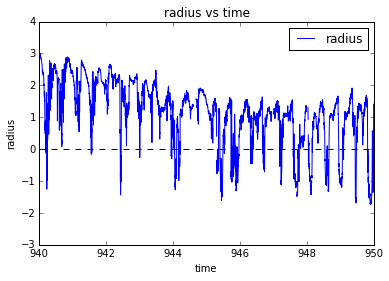

In [5]:
data = "rev26_27.dat"
recdat = np.recfromtxt(data, names = ["time", "r", "theta", "phi"])
plt.plot(recdat.time, recdat.r)
plt.xlim([940, 950])
plt.ylim([-3, 4])
plt.xlabel("time")
plt.ylabel("radius")
plt.title("radius vs time")
plt.plot(948, 3.8, "b", label="radius")
plt.legend()
plt.axhline(0, color='k', ls='--')

One function that is sometimes useful when plotting functions is `fill_between`. As its name suggests, it fills some colour between specified values.  On the one hand, this could be a function and a constant value, as in the cell below:

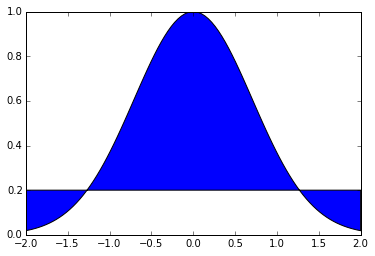

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,100)
y = np.exp(-x**2)

plt.fill_between(x, 0.2, y, facecolor='b')

... or it could be between two functions, as below:

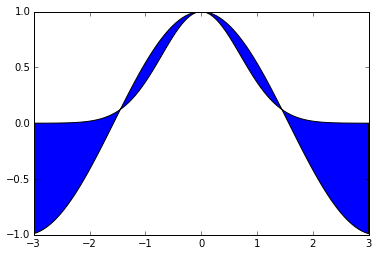

In [6]:
x = np.linspace(-3,3,100)
y1 = np.exp(-x**2)
y2 = np.cos(x)
plt.fill_between(x, y1, y2, facecolor='b')

## Contour plots and images

If we have a 2D array, it is often useful to be able to represent this as either a contour plot or as an image, and we now discuss methods for achieving this using Matplotlib. 

Let's define a 2D array, starting from a 1D sine wave:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['contour.negative_linestyle'] = 'dashed'

x = np.linspace(-np.pi,np.pi,200)
y = x
t = np.sin(x)
plt.plot(x,t)
plt.axhline(0, ls=':')
plt.axvline(0, ls=':')

We can transpose the array `t` and multiply it by the original to obtain a 2D array through Nunpy's broadcasting rules...

In [30]:
z = t*t[:,np.newaxis]

...and now we can plot the 2D array using `contour`:

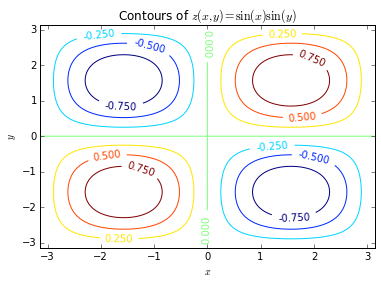

In [37]:
cp = plt.contour(x, y, z)
plt.clabel(cp, inline=1, fontsize=10)
plt.title('Contours of '+r'$z(x,y)=\sin(x)\sin(y)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

The coordinate arrays `x` and `y` are optionally passed to provide the function with the coordinate extents, and with no further settings the contours are coloured as above.  We have added labels to the contour lines (inline with the lines themselves) and plot labels.  If we choose to have the contour lines all in a single colour, the default is for negative contours to be dashed:

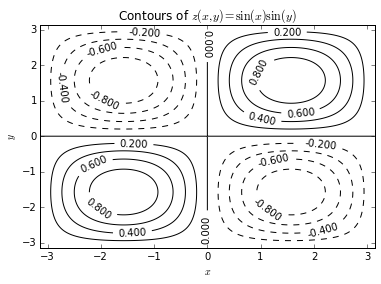

In [38]:
cp = plt.contour(x, y, z, 10, colors='k')
plt.clabel(cp,inline=1, fontsize=10)
plt.title('Contours of '+r'$z(x,y)=\sin(x)\sin(y)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Note that we have also specified the number of contour levels in this example.  If we wish, we can specify manually the values at we wish to contour.  The function `contourf` produces filled contour plots in which the regions between the levels are coloured:

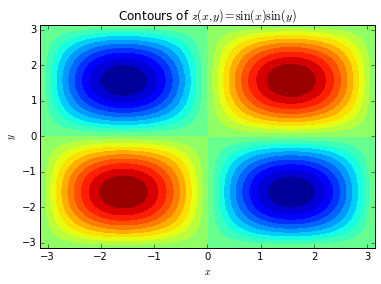

In [39]:
plt.contourf(x, y, z, 20)
plt.title('Contours of '+r'$z(x,y)=\sin(x)\sin(y)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

And we can use the function `imshow` to show the contour using a continuous colour scale:

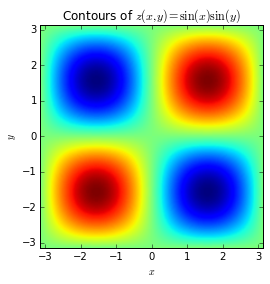

In [40]:
plt.imshow(z, origin='lower', extent = [-np.pi, np.pi, -np.pi, np.pi])
plt.title('Contours of '+r'$z(x,y)=\sin(x)\sin(y)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Note that the aspect ratio is controlled automatically by `imshow`, although this behaviour can be modified - see the [imshow docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) for further information.  Further, `imshow` does not by default know the coordinate extent of the array - it deals with only the numbers of elements - so we have to put that in manually via the `extent` keyword.  The keyword `origin` tells `imshow` that the first element of our array is at the bottom of the image (note that this is the opposite to how arrays are printed at the interpreter!), otherwise the image would be upside down.

Let's put these together and add a colour bar:

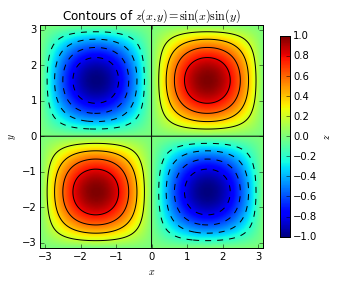

In [55]:
im = plt.imshow(z, origin='lower', extent = [-np.pi, np.pi, -np.pi, np.pi])
cp = plt.contour(x, y, z, 10, colors='k')
cb = plt.colorbar(im, shrink=0.9)
cb.set_label(r'$z$', rotation=270, labelpad=15)
plt.title('Contours of '+r'$z(x,y)=\sin(x)\sin(y)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Note that here we use the object returned by `imshow` as a parameter to `colorbar`.  The keyword `shrink` makes the colour bar slightly smaller than the height of the panel for aesthetic purposes, and we use the colour bar's function `set_label` to set the label on the axis.  We have rotated the text around such that the bottom of the "z" is pointing inward, and we have used the keyword `labelpad` to move it outward slightly from the default location.

#### Task 8.3

The Earth's magnetic field is to a first approximation dipolar (i.e. shaped like that of a bar magnet).  Such a cylindrically symmetric magnetic field can be described using cylindrical coordinates, $(\rho,z,\varphi)$, and we can represent the magnetic field mathematically using a *vector potential* ${\mathbf{A}(\rho,z)=A(\rho,z)\pmb{\hat{\varphi}}}$, related to the magnetic field via $\mathbf{B} = \mathrm{curl}\mathbf{A}$.  This is a useful construct, because $\mathrm{div}\,\mathrm{curl}\mathbf{A}=0$ for *any* $\mathbf{A}$, and hence the 'no-monopoles' law is automatically satisfied by any magnetic field described in this way. The components of the magnetic field are then given by

$$B_\varphi=0\;\;,$$

$$B_\rho=-\frac{\partial A}{\partial z}\;\;,$$
and
$$B_z=\frac{1}{\rho}\frac{\partial (\rho A)}{\partial\rho}\;\;.$$

The vector potential for a dipole field is given by

$$A_\varphi= B_E\rho\left(\frac{R_E}{r}\right)^3\;\;,$$

where $B_E$ and $R_E$ are the equatorial surface magnetic field strength and radius of the Earth, respectively, and $r$ is radial distance from the centre of the planet.  Magnetic field lines are given by contours of a *flux function* $F$ given by

$$F=\rho A_\varphi$$.

The Earth's surface magnetic field at the equator $B_E$ is 3,120 nT and its radius $R_E$ is 6,371 km.

* Using this information, create a contour plot of the Earth's magnetic field along a bisecting plane  covering $\rho<20\,\mathrm{R_p}$ (remember it's symmetric, so the horizontal coordinate goes from -$20\,\mathrm{R_p}$ to +$20\,\mathrm{R_p}$) and $-10\,\mathrm{R_p}<z<10\, \mathrm{R_p}$.   
* Start by creating the coordinate grids for $\rho$ and $z$, and the radius $r$. A grid cell size of ~0.02 $\mathrm{R_p}$ should be fine.  
* Next, compute the vector potential $A$ and thence the magnetic field components.  Be careful regarding your units!  If for your coordinate grid you use e.g. $\rho$ that goes from 0 to 20, then this value is actually $(\rho\,/\,R_E)$.  
* Show the magnetic field lines (contours of $F$) using about 5 or so black lines roughly equally spaced at the equator.  
* In the same `Axis` show using colours the logarithm of the magnitude of the magnetic field (or either of its non-zero components if you like!) in nT, and add a colour bar.  Make sure axes are labelled.  

Hint: you can calculate the partial derivatives using

```python
gradf = np.gradient(f, step*rp) 
```

where here step is the grid cell size in $\mathrm{R_p}$.  Check out the Numpy docs for further info on gradient. You can make your figure nice and big by putting  

```python
plt.figure(figsize=(14, 7))
```

before any plotting lines.

/cm/shared/apps/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/cm/shared/apps/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


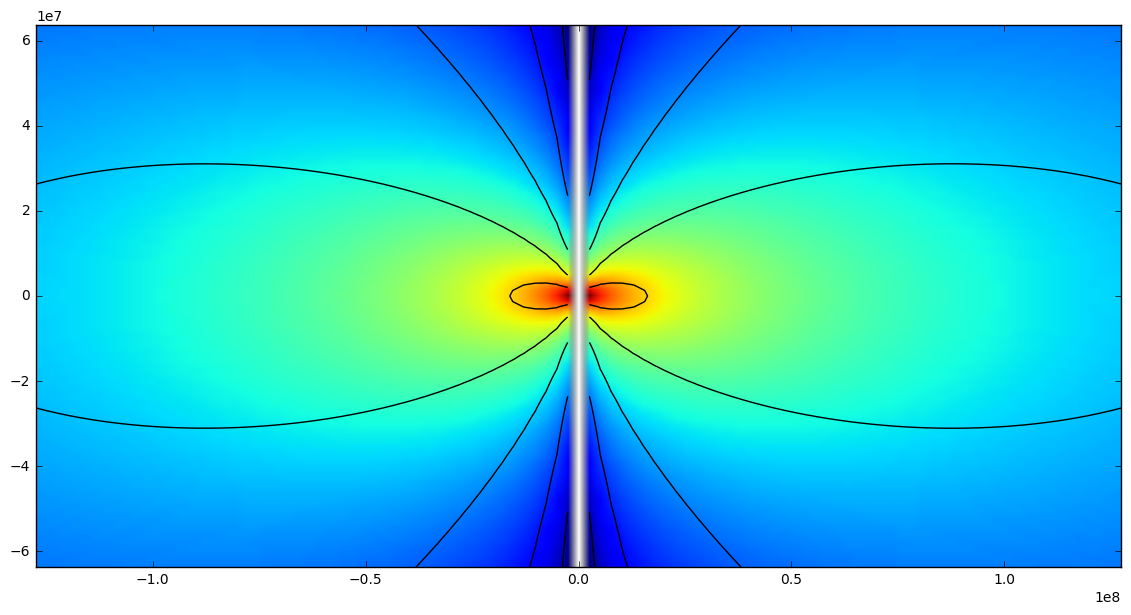

In [3]:
r_e = 6371e3
b_e = 3120

rho = np.abs(np.arange(-r_e, 1.0001*r_e, 0.02*r_e))
z = np.arange(-r_e, 1.0001*r_e, 0.02*r_e)[:, np.newaxis]

def r():
    r_e = 6371e3
    b_e = 3120e-9
    rho = np.arange(-r_e, 1.0001*r_e, 0.02*r_e)
    z = np.arange(-r_e, 1.0001*r_e, 0.02*r_e)[:, np.newaxis]
    r = (((1000-1)/2-rho)**2 + ((500-1)/2-z)**2)**0.5
    return r

a = b_e*rho*(r_e/r())**3
f = rho*a
#print np.gradient(np.log10(a), 0.02*r_e, edge_order = 2)
plt.figure(figsize = (14,7))

plt.imshow(np.log10(a), extent = [-20*r_e, 20*r_e, -10*r_e, 10*r_e])

plt.contour(np.log10(f), 5, colors ="k", extent =[-20*r_e, 20*r_e, -10*r_e, 10*r_e])


## Multiple panels

In all the previous plots, we have only plotted one axis on each figure.  This would make for rather bulky scientific texts if it were the only manner of arranging axes!  Here we therefore discuss some methods of putting multiple panels in one Figure.  There are a number of these, but we focus on two.

The first and simplest method that we discuss uses the `subplot` method, as illustrated below:

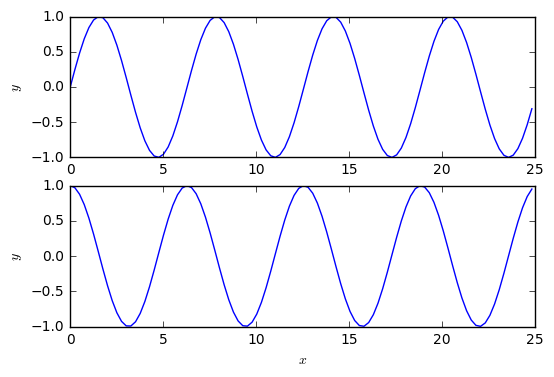

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,7.9*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax = plt.subplot(2, 1, 1)
ax.plot(x,y1)
ax.set_ylabel(r'$y$')

ax = plt.subplot(212)
ax.plot(x,y2)
plt.ylabel(r'$y$')
ax.set_xlabel(r'$x$')



The function `subplot` takes either a sequence of 3 `int`s or a single `int` as the parameters describing the subplot's location and size.  For illustration we have used both methods above. `Subplot` splits the figure into rows and columns of subplots.  If three arguments are passed, these then correspond to the number of rows, the number of columns, and which of these is the present one.  If these numbers are less than 10, there exists a convenience method in which these can be shortened into one `int` in the hundreds, each digit of which corresponds to the numbers above. Hence, 

```python
ax = plt.subplot(212)
```

is equivalent to 

```python
ax = plt.subplot(2,1,2)
```

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**IMPORTANT!**</p>
<p>The column and row numbers in subplot start at 1, not 0!</p>
</div>

Note also that our plot function is now a function associated with the object returned from `subplot`, i.e. `ax`, and not `plt` as has been the case in all our previous plots.  This is where the objected-orientedness of Python starts to become more visible.  Don't worry about this too much for now - simply note that this `plot` function is identical to that which we have been using already, except that it is explicitly tied to a particular `Axis` on the `FigureCanvas` (the previous one was too, behind the scenes).  Hence, each time we define a new axis, we can produce plots associated with that axis.  If we don't overwrite the identifier (as we did with `ax` in the above example), we can also go back and change a previous `Axis` object at any time - again making use of the Object Oriented nature of Matplotlib.  There are, however, some slight niggly differences between the syntax used for `Axis` and `plt` commands.  For example, the function to set an axis label is, for an axis called `ax`:

```python
ax.set_ylabel('<something>')
```
c.f.

```python
plt.ylabel('<something>')
```
There is, however, the concept of the "current axis", which is that most recently-defined. Functions called using `plt.` will default to the current axis, as happened on line 14 of the above cell.

#### Task 8.4

In the cell below, produce a figure with a regular $2\times2$ grid of axes, and plot a different function in each one.  At the bottom of the code, write a line that adds text with the word "shrubbery" in the top left of the first `Axis` that was created.

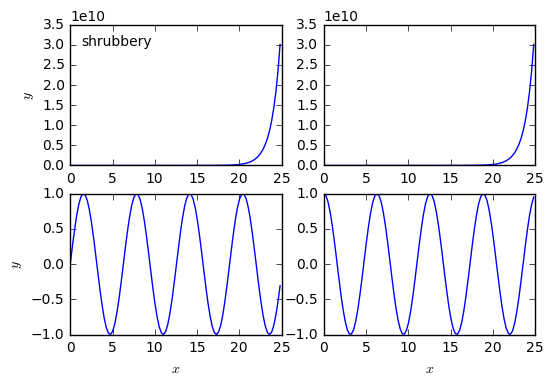

In [128]:
x = np.linspace(0,7.9*np.pi, 100)
y1 = np.sinh(x)
y2 = np.cosh(x)
y3 = np.sin(x)
y4 = np.cos(x)

ax1 = plt.subplot(221)
ax1.plot(x,y1)
ax1.set_ylabel(r'$y$')

ax2 = plt.subplot(222)
ax2.plot(x,y2)

ax3 = plt.subplot(223)
ax3.plot(x,y3)
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')

ax4 = plt.subplot(224)
ax4.plot(x,y4)
ax4.set_xlabel(r'$x$')

ax1.text(0.05, 0.85, 'shrubbery', transform = ax1.transAxes)

We can adjust the spacing between each plot, and the overall boundaries of the grid using the function `subplots_adjust`:

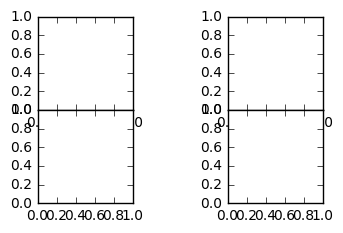

In [112]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(bottom=0.2, right=0.6, top=0.9, hspace=0.001, wspace=1.0)

plt.subplot(321)
plt.subplot(322)
plt.subplot(323)
plt.subplot(324)

The `bottom`, `left`, `right` and `top` values give the boundaries of the overall grid as fractions of the height or width of the `FigureCanvas` as measured from the bottom left, and the `hspace` and `wspace` give the height and width space between the subplots.

<div class="alert alert-info" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**HINT**</p>
<p>To obtain contiguous (i.e. touching adjacent) panels, use a very small number, e.g. 0.001; using zero does not work.</p>
</div>

The second method that we discuss is similar to `subplot` but allows the user to define panels that spread over a number of grid locations.  The grid is defined similar to for `subplot`, except that the indices **start at 0, not 1**!  Plots that range over different grid locations are defined using standard Numpy-like slicing.  We first define a `gridspec` object, and then pass to `subplot` the `gridspec` object, sliced appropriately:


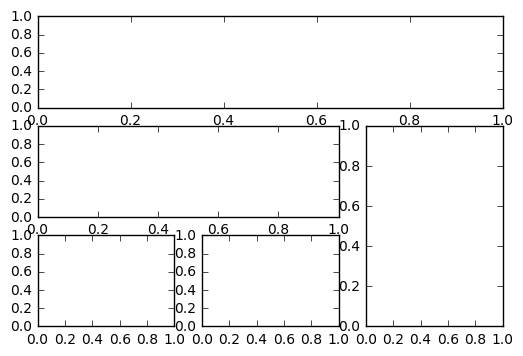

In [5]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1,:-1])
ax3 = plt.subplot(gs[1:,-1])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

Remember that the first coordinate is vertical, and the second is horizontal.  The origin (0,0) is in the top left.

#### Task 8.5
Redo (again) the task reading in and plotting the Cassini magnetometer data, but this time:
* Plot all 3 components in their own panel, stacked vertically, and with the panels touching.  
* Plot the individual data points as blue pixel dots, and set the y limits to be between -4 to 4. 
* To the right, in a panel that spans these three, plot a histogram of the $B_r$ data. Colour the histogram green, and make it semi-transparent.  
* Make sure all axes are labelled. 

Hint: tick labels can be removed using 
```python
plt.setp( ax.get_xticklabels(), visible=False)
```
and again it might help to make the Figure large using

```python
plt.figure(figsize=(14, 7))
```

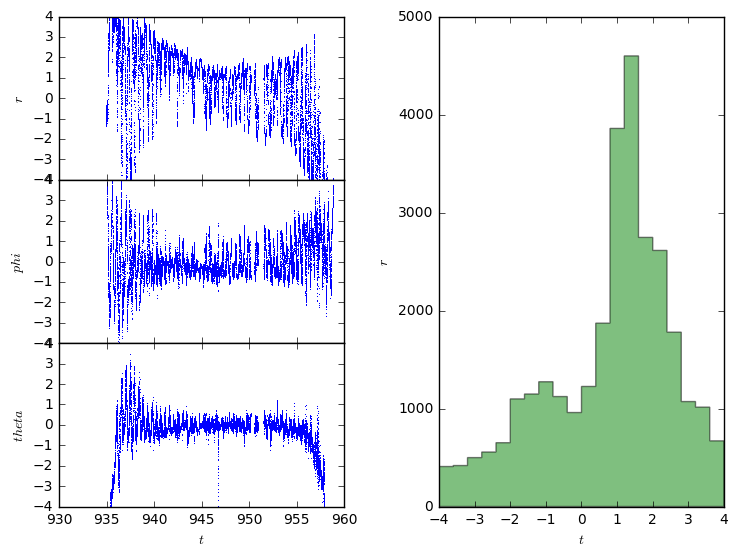

In [15]:
data = "rev26_27.dat"
recdat = np.recfromtxt(data, names = ["time", "r", "theta", "phi"])

plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(3, 4)
plt.subplots_adjust(bottom=0.2, right=0.6, top=0.9, hspace=0.001, wspace=1.0)


ax1 = plt.subplot(gs[0, :2])
plt.ylim([-4,4])
ax1.plot(recdat.time, recdat.r, "b,")
plt.setp( ax1.get_xticklabels(), visible=False)
ax1.set_ylabel(r'$r$')

ax2 = plt.subplot(gs[1, :2])
plt.ylim([-4,4])
ax2.plot(recdat.time, recdat.phi, "b,")
plt.setp( ax2.get_xticklabels(), visible=False)
ax2.set_ylabel(r'$phi$')

ax3 = plt.subplot(gs[2, :2])
plt.ylim([-4,4])
ax3.plot(recdat.time, recdat.theta, "b,")
ax3.set_ylabel(r'$theta$')
ax3.set_xlabel(r'$t$')

ax4 = plt.subplot(gs[:, 2:])
ax4.set_xlabel(r'$t$')
ax4.set_ylabel(r'$r$')
n, bins, patches = plt.hist(recdat.r, bins=20, histtype='stepfilled', color='g', alpha=0.5, range = (-4,4))

## Animations


As well as static plots, Matplotlib has a limited capability to create animations.  This can be done either by simply putting the plot function inside a loop, which updates the ploting data during each loop increment, or by using a Matplotlib package that does this for you. There are pros and cons for each method, as we will now examine.  Let's look at the loop method first:

In [238]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

x = np.linspace(0, 2*np.pi, 600)        # x-array
line, = ax.plot(x, np.tan(x))
ax.set_ylim([-10,10])

plt.show()
plt.ion()
for i in np.arange(300.):
    line.set_ydata(np.tan(x+i/10.0))  # update the data
    plt.pause(0.01)
print 'Animation stopped!'

Using matplotlib backend: TkAgg
Animation stopped!


So, what's going on here?  The first thing to note is that we can't run animations in this IPython Notebook, so we have to create a `Figure` in its own separate window.  As noted at the start of the course, this is actually the method used in scientific computing anyway; we have so far been using this Notebook as a convenience for this Workshop, but we will now graduate to creating `Figure`s in their own window.  

So, line 1 switches Matplotlib from the inline figure method used previously to use a "back-end" (the name for the behind-the-scenes code that does the work in drawing the `Figure`) that creates a `Figure` in its own window.  We only need to run this once in this session, and normally not at all - opening `Figure`s in their own window is the default behaviour outside of a Notebook.  On line 5 we have

```python
fig = plt.figure()
```

This is the standard way of creating a new `Figure` object, opening a new window for plotting. 

<div class="alert alert-success" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**INFO**</p>
<p>Just as we can flip between different Axes that we have created, we can also flip between Figures, as if we were turning the pages of a book. </p>
</div>

On line 6 we create an `Axis` that covers most of the `FigureCanvas`.  On lines 8 and 9 we create our abscissa $x$ and plot $y=\tan(x)$.  But note - we have now collected the object returned by `plot` and called it `line,`.   Recall from Section 2 that a comma after an indentifier means that it's a single-element tuple (an immutable list, for which the brackets are optional). `Plot` returns a tuple containing all of the lines drawn on a plot - on ours, there is only one.  If we had not used the comma, `line` would refer to the tuple, with the line object being the first (and only) element.  Using the comma, the tuple is unpacked and `line` then refers the line object.  Now, on lines 14-16 there is a loop in which the data for the object `line` is modified by incrementing `i` during each execution.  This makes use of Object Oriented nature of Matplotlib; the line object possesses data associated with it - the coordinates of the line - which can be updated, and when the plot is re-drawn during each cycle of the loop the line position changes. Note that we have to tell the computer to draw the plot and then show it - this is useful in that the plot objects can be changed as needed before it's drawn.  

When this code is run, the plot is redrawn repeatedly, with the line updated each time, until `i` reaches 299. The advantage of this method is that the loop method provides a convenient way to stop the execution of the animation when a particular condition is reached.  However, there is no straightforward way of fine-tuning the speed of execution, which by default occurs as fast as the processor will let it.  Also, the entire plot is redrawn each time, which in principle invloves a lot of excessive computation if only a small element of the plot is changed each time.  This is where the `animation` module comes in. The key advantages are that the user can specify a refresh rate in milliseconds, and there exists an option to *blit* the plot, i.e. only redraw those elements that have changed since the last refresh.  The following code illustrates the use of a procedure called `FuncAnimation`, which repeatedly calls a function and updates the display.  Execute the cell below, and to stop the animation, just close the plot window.

In [241]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax = plt.subplot(111)

x = np.linspace(0, 2*np.pi, 600)        # x-array
line, = ax.plot(x, np.tan(x))
ax.set_ylim([-10,10])

def animate(i):
    line.set_ydata(np.tan(x+i/10.0))  # update the data
    return line,

# def init():
#     line.set_ydata(np.ma.array(x, mask=True))
#     return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 400), 
    interval=25, repeat=False, blit=False)
print 'Animation running!'
plt.show()

Using matplotlib backend: TkAgg
Animation running!


Apart from the extra import of `matplotlib.animation`, the first 12 lines are identical to our previous example.  On line 14, we now define a function that we have called `animate`, and that takes by default an `int` as an argument. The `int` is incremented each time according to the arguments passed to `FuncAnimation`.  The `line` data are updated in function `animate`, and returned.  On line 23, we call the function `FuncAnimation`, with arguments being the `Figure` being updated, `fig`, the function doing the updating, `animate`, and the increment information (in this case this is an array that is iterated, to give the value of i, but could be just an `int` giving the number of frames over which to loop). The last keyword gives the refresh interval in milliseconds. The advantage of this method is that the user can control the animation refresh rate, and the animation will loop indefinitely.  However, `FuncAnimation` does not provide an elegant way of stopping the animation, other than closing the plot window, and the the code following the `FuncAnimation` call will execute immediately. 

### 3-D plots

Matplotlib can also create 3D plots (other 3D plotting packages are available).  Take a look at the following:

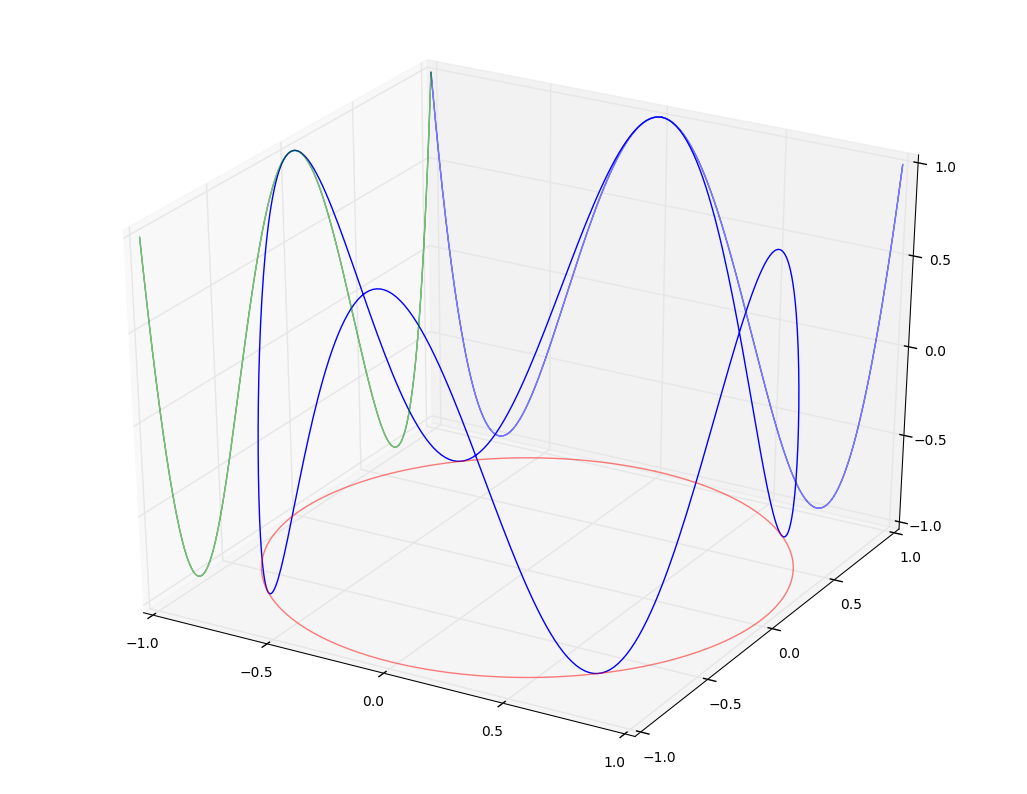

In [216]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create new Figure
f = plt.figure(1, figsize=(13,10))
ax = f.add_subplot(111, projection='3d')

t = np.linspace(0,2.*np.pi,400)

z = np.cos(4.*t)
x = np.sin(t)
y = np.cos(t)
ax.plot(x, y, z)

ax.plot(x,y,np.tile(-1,400),'r', alpha=0.5)
ax.plot(x,np.tile(1,400), z,'b', alpha=0.5)
ax.plot(np.tile(-1,400),y, z,'g', alpha=0.5)


plt.draw()
plt.show()


Once you import `Axes3D`, you can use the `projection='3d'` keyword when instantiating the subplot. This allows 3D plotting of e.g. lines (as above) and contour plots (as below).

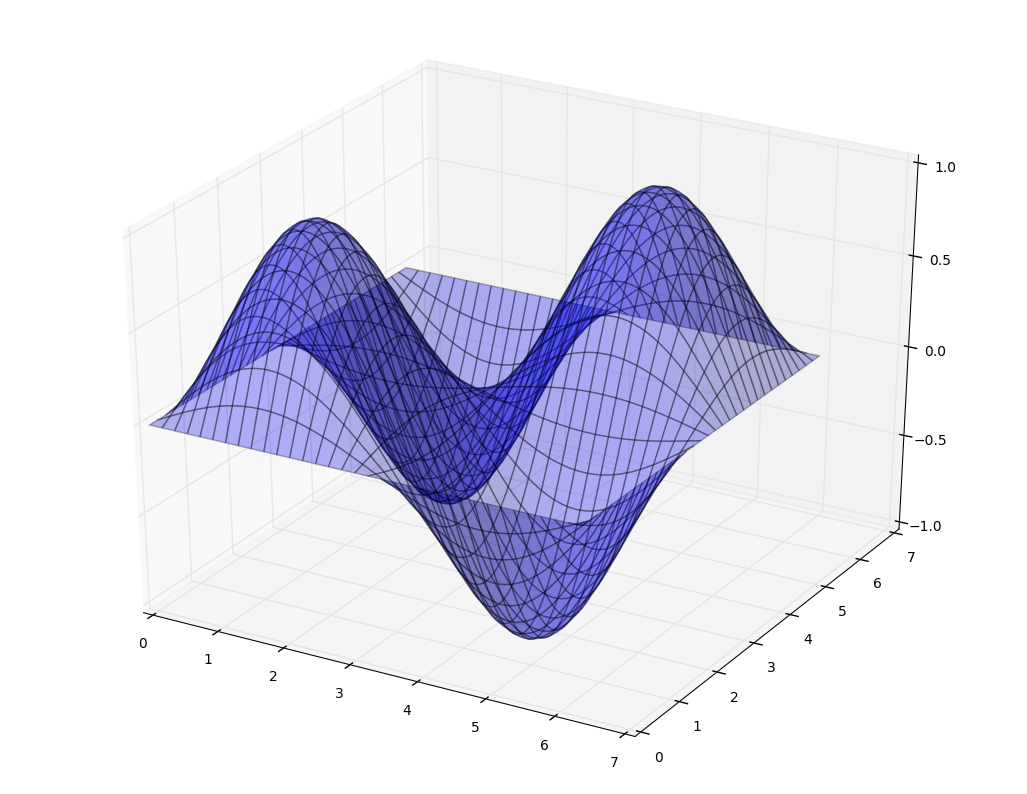

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create new Figure
f = plt.figure(1, figsize=(13,10))
ax = f.add_subplot(111, projection='3d')


d = np.linspace(0,2.*np.pi,100)
X, Y = np.meshgrid(d, d)
Z = np.sin(X)*np.sin(Y)
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, alpha=0.3)

plt.draw()
plt.show()


#### Task 8.6

Using `Axes3D`, plot a helix (corkscrew).

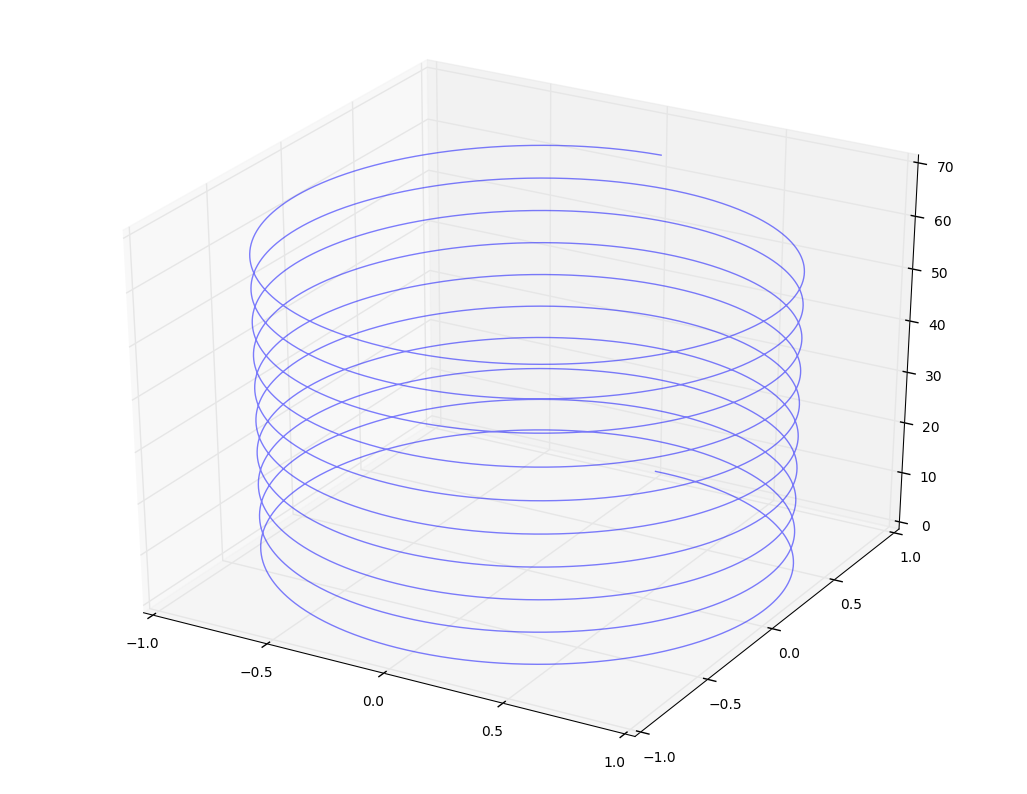

In [235]:
f = plt.figure(1, figsize=(13,10))
ax = f.add_subplot(111, projection='3d')

z = np.linspace(0, 20*np.pi, 10000)
x = np.sin(z)
y = np.cos(z)

ax.plot(x, y, z,'b', alpha=0.5)

<div class="alert alert-danger" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**Checkpoint: Please have the above marked and signed off by a demonstrator before continuing**</p>
</div>